In [2]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
(x_train, y_train), (x_test, y_test)  = tf.keras.datasets.cifar10.load_data()

In [24]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
image_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

automobile


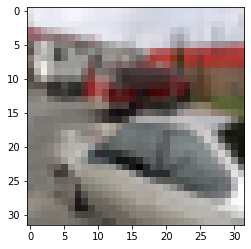

In [11]:
plt.imshow(x_train[49999])
print(image_class[y_train[49999][0]])

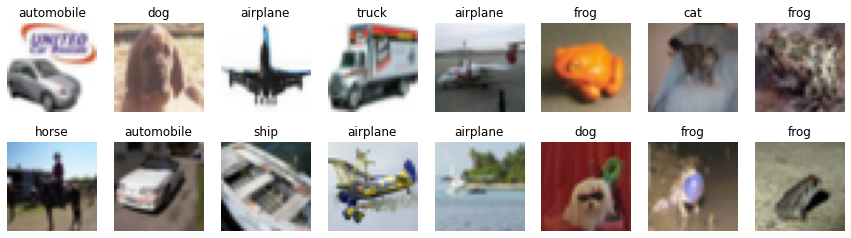

In [12]:
rows = 2
cols = 8
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.axis('off')
        ax.grid('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(image_class[y_train[random_index, 0]])

plt.show()

In [18]:
x_train = x_train / 255.0 - 0.5
x_test = x_test / 255.0 - 0.5

y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1, )

## 2 Hidden Layer Dense Neural Network

In [20]:
model_ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_ann.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 129s 82ms/step - loss: 1.6950 - accuracy: 0.4014
Epoch 2/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.5131 - accuracy: 0.4664
Epoch 3/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4103 - accuracy: 0.5018
Epoch 4/10
1563/1563 [==============================] - 124s 79ms/step - loss: 1.3209 - accuracy: 0.5316
Epoch 5/10
1563/1563 [==============================] - 112s 72ms/step - loss: 1.2479 - accuracy: 0.5595
Epoch 6/10
1563/1563 [==============================] - 121s 78ms/step - loss: 1.1634 - accuracy: 0.5885
Epoch 7/10
1563/1563 [==============================] - 128s 82ms/step - loss: 1.0924 - accuracy: 0.6133
Epoch 8/10
1563/1563 [==============================] - 127s 81ms/step - loss: 1.0236 - accuracy: 0.6384
Epoch 9/10
1563/1563 [==============================] - 129s 83ms/step - loss: 0.9568 - accuracy: 0.6639
Epoch 10/10
1563/1563 [==============================] 

In [21]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_ann.evaluate(x_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.5955 - accuracy: 0.5241


[1.5955359935760498, 0.5241000056266785]

## 1 Convolutional + 1 Pooling --> 1 Convolutional + 1 Pooling

In [25]:
model_conv2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPool2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_conv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_conv2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.3640 - accuracy: 0.5135
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0096 - accuracy: 0.6453
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8756 - accuracy: 0.6971
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7810 - accuracy: 0.7277
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7030 - accuracy: 0.7550
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6333 - accuracy: 0.7797
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.5691 - accuracy: 0.8010
Epoch 8/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.5122 - accuracy: 0.8201
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.4606 - accuracy: 0.8365
Epoch 10/10
1563/1563 [==============================] - 47s 30m

In [27]:
model_conv2.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0126 - accuracy: 0.7018


[1.0126142501831055, 0.7017999887466431]

In [30]:
model_conv2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

## 2 Convolutional + 1 Pooling --> 2 Convolutional + 1 Pooling

In [28]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation=tf.keras.layers.LeakyReLU(0.1), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.keras.layers.LeakyReLU(0.1)),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.keras.layers.LeakyReLU(0.1)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.keras.layers.LeakyReLU(0.1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len(image_class), activation='softmax')
])

In [29]:
s = tf.keras.backend.clear_session()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 144s 91ms/step - loss: 1.2270 - accuracy: 0.5604
Epoch 2/10
1563/1563 [==============================] - 123s 79ms/step - loss: 0.7626 - accuracy: 0.7325
Epoch 3/10
1563/1563 [==============================] - 166s 106ms/step - loss: 0.5311 - accuracy: 0.8144
Epoch 4/10
1563/1563 [==============================] - 179s 115ms/step - loss: 0.3393 - accuracy: 0.8813
Epoch 5/10
1563/1563 [==============================] - 163s 104ms/step - loss: 0.2007 - accuracy: 0.9312
Epoch 6/10
1563/1563 [==============================] - 183s 117ms/step - loss: 0.1356 - accuracy: 0.9529
Epoch 7/10
1563/1563 [==============================] - 191s 122ms/step - loss: 0.1093 - accuracy: 0.9623
Epoch 8/10
1563/1563 [==============================] - 184s 118ms/step - loss: 0.0968 - accuracy: 0.9667
Epoch 9/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.0840 - accuracy: 0.9722
Epoch 10/10
1563/1563 [==========================

In [35]:
y_test_pred = model.predict(x_test)
y_test_pred_max = np.argmax(y_test_pred, axis = 1)

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred_max))

0.7389


In [43]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 14s 43ms/step - loss: 1.6943 - accuracy: 0.7389


[1.6943175792694092, 0.7389000058174133]